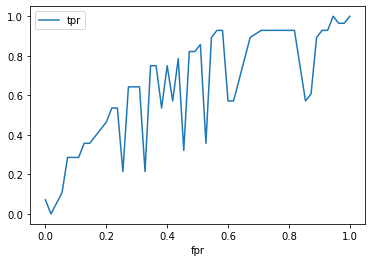

In [1]:
import pandas as pd

df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/code/roc_cat.csv',index_col=0).sort_values('fpr')
df=df.groupby('fpr').max().reset_index()
df.set_index('fpr').plot()
df.set_index('fpr').to_csv('tmp.csv')


In [2]:
import zedstat 
import pylab as plt
plt.style.use('ggplot')
zt=zedstat.processRoc(df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/code/roc_cat.csv',index_col=0),
           order=3, 
           total_samples=502+470,
           positive_samples=470,
           alpha=0.01,
           prevalence=470/(502+470))

local version 1


{'U': array([0.79519607]), 'L': array([0.72947925]), 'nominal': 0.7623376623376624}


<AxesSubplot:xlabel='fpr'>

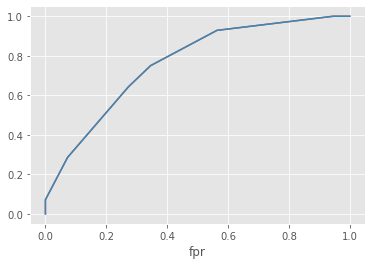

In [3]:
zt.smooth(STEP=0.001,interpolate=False)
zt.get().tpr.plot()
zt.allmeasures(interpolate=True)
zt.nominal_auc()
zt.getBounds()
print(zt._auc)

zt.get().tpr.plot()

In [4]:
zt.smooth(STEP=0.001,interpolate=False)

zt.get()

,tpr
fpr,
0.000000,0.000000
0.000000,0.071429
0.072727,0.285714
0.272727,0.642857
0.345455,0.750000
0.563636,0.928571
0.945455,1.000000
1.000000,1.000000


local version 1


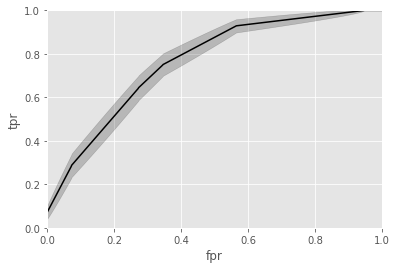

In [5]:
import zedstat 
import pylab as plt
plt.style.use('ggplot')
zt=zedstat.processRoc(df=pd.read_csv('/home/ishanu/Dropbox/gibbons_global/code/roc_cat.csv',index_col=0),
           order=3, 
           total_samples=502+470,
           positive_samples=470,
           alpha=0.01,
           prevalence=470/(502+470))
zt.smooth(STEP=0.001,interpolate=False)
zt.allmeasures(interpolate=True)
#print('-----')
#display(zt.get())
zt.usample(precision=3)
#print('-----xxxxx')
#display(zt.get())
zt.getBounds()
#print('-----wwwww')
#display(zt.get())

ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [6]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.000,0.000000,1.000000,0.516461,0.516461,73.926275,1.000000
0.000,0.071429,1.000000,0.550999,0.535062,60.492985,0.928571
0.001,0.074364,0.982924,0.551902,0.535607,74.363992,0.926563
0.002,0.077299,0.968002,0.552805,0.536153,38.649706,0.924550
0.003,0.080235,0.954840,0.553708,0.536702,26.744945,0.922533
...,...,...,...,...,...,...
0.996,1.000000,0.484540,0.485605,1.000000,1.004016,0.000000
0.997,1.000000,0.484289,0.485088,1.000000,1.003009,0.000000
0.998,1.000000,0.484039,0.484572,1.000000,1.002004,0.000000


In [7]:
zt.auc()

(0.7624107142857143, 0.7984467965701464, 0.7263746320012822)

In [8]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.000,0.000000,1.000000,0.516461,0.516461,73.926275,1.000000
0.000,0.071429,1.000000,0.550999,0.535062,60.492985,0.928571
0.001,0.074364,0.982924,0.551902,0.535607,74.363992,0.926563
0.002,0.077299,0.968002,0.552805,0.536153,38.649706,0.924550
0.003,0.080235,0.954840,0.553708,0.536702,26.744945,0.922533
...,...,...,...,...,...,...
0.996,1.000000,0.484540,0.485605,1.000000,1.004016,0.000000
0.997,1.000000,0.484289,0.485088,1.000000,1.003009,0.000000
0.998,1.000000,0.484039,0.484572,1.000000,1.002004,0.000000


<AxesSubplot:xlabel='fpr'>

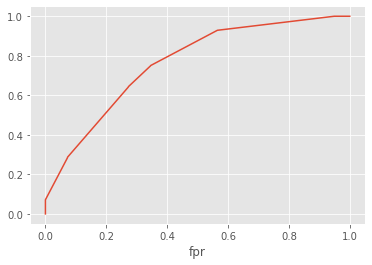

In [9]:
zt.get().tpr.plot()

In [10]:
xf=zt.get()
xf.ppv[xf.ppv>1]=1
xf


,tpr,ppv,acc,npv,LR+,LR-
fpr,,,,,,
0.000,0.000000,1.000000,0.516461,0.516461,73.926275,1.000000
0.000,0.071429,1.000000,0.550999,0.535062,60.492985,0.928571
0.001,0.074364,0.982924,0.551902,0.535607,74.363992,0.926563
0.002,0.077299,0.968002,0.552805,0.536153,38.649706,0.924550
0.003,0.080235,0.954840,0.553708,0.536702,26.744945,0.922533
...,...,...,...,...,...,...
0.996,1.000000,0.484540,0.485605,1.000000,1.004016,0.000000
0.997,1.000000,0.484289,0.485088,1.000000,1.003009,0.000000
0.998,1.000000,0.484039,0.484572,1.000000,1.002004,0.000000
